In [3]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.3.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [3]:
# Import imdb

from tensorflow.keras.datasets import imdb

In [4]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [5]:
# Inspect the type of the data

print("Train Data Shape: {}".format(x_train.shape))
print("Train Labels Shape: {}".format(y_train.shape))

Train Data Shape: (25000,)
Train Labels Shape: (25000,)


In [6]:
# Inspect the type of the data

print("Test Data Shape: {}".format(x_test.shape))
print("Test Labels Shape: {}".format(y_test.shape))

Test Data Shape: (25000,)
Test Labels Shape: (25000,)


In [7]:
# Display the first dataset element input
# Notice encoding

print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
# Display the first dataset element output

print(y_train[0])

1


#### Load dataset with different options

In [9]:
# Load the dataset with defaults

imdb.load_data(path="/content/imdb.npz", index_from=3)

# ~/.keras/dataset/

17465344/17464789 [==============================] - 0s 0us/step


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [10]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(path="/content/imdb.npz", num_words=500)

((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [11]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(path="/content/imdb.npz", skip_top=10, oov_char=2)

((array([list([2, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 22665, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 21631, 336, 385, 39, 2, 172, 4536, 1111, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2025, 19, 14, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 2, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2223, 5244, 16, 480, 66, 3785, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 10311, 2, 2, 107, 117, 5952, 15, 256, 2, 31050, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 12118, 1029, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 2, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([2, 19

In [12]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(path="/content/imdb.npz", maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [13]:
 # Use '1' as the character that indicates the start of a sequence

 imdb.load_data(path="/content/imdb.npz", start_char=1)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [14]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [15]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3

imdb_word_index = {key: value+index_from for key, value in imdb_word_index.items()}

In [16]:
# Retrieve a specific word's index

print("Fuck: {}".format(imdb_word_index["fuck"]))
print("The: {}".format(imdb_word_index["the"]))
print("is: {}".format(imdb_word_index["is"]))

Fuck: 54485
The: 4
is: 9


In [17]:
# View an input sentence

inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}

" ".join([inv_imdb_word_index[word] for word in x_train[0] if word > index_from])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be 

In [18]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [19]:
# Load the imdb data set

(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [20]:
# Inspect the input data shape.
# Length of Each Review

[len(x) for x in x_train[:10]]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [21]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding="post", truncating="post", value=0.0)

In [22]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [23]:
# Import numpy 

import numpy as np

In [24]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, axis=-1)

padded_x_train.shape

(25000, 300, 1)

In [25]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype=tf.float32)
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [26]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [27]:
# Look at the dataset

tf_x_train._keras_mask

AttributeError: ignored

In [28]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [4]:
from tensorflow.keras import layers, models, callbacks
import numpy as np

In [5]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = layers.Embedding(input_dim=501, output_dim=16, mask_zero=False)

In [6]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequences_idx = tf.random.uniform(shape=(5, 10, ), minval=1, maxval=500, dtype=tf.int32)

sequence_emd = embedding_layer(sequences_idx)
sequence_emd.shape

TensorShape([5, 10, 16])

In [7]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0].shape

(501, 16)

In [8]:
# Get the embedding for the 4th index

sequence_emd[0, 4]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([-0.04794912, -0.02267637,  0.00813713,  0.04214254,  0.00555458,
       -0.02797263,  0.04208437,  0.01627687, -0.02544979,  0.0433146 ,
        0.02657041,  0.00683339, -0.04080252,  0.03867007,  0.04649437,
        0.04983782], dtype=float32)>

In [9]:
# Get the embedding corrosponding to 4

embedding_layer(tf.constant([[4]]))

<tf.Tensor: shape=(1, 1, 16), dtype=float32, numpy=
array([[[ 0.03563842,  0.00201718,  0.0038924 , -0.03688633,
          0.04780615,  0.04300157, -0.04038479,  0.03331479,
         -0.02109056,  0.02576854,  0.01062188, -0.04384543,
          0.04442978,  0.04721821, -0.02587217,  0.04008048]]],
      dtype=float32)>

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [10]:
# Create a layer that uses the mask_zero kwarg

embedding_layer = layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [11]:
# Apply this layer to the sequence and see the _keras_mask property

sequences_idx = tf.random.uniform(shape=(5, 10, ), minval=1, maxval=500, dtype=tf.int32)

sequence_emd = embedding_layer(sequences_idx)
sequence_emd._keras_mask

<tf.Tensor: shape=(5, 10), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [37]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [38]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

In [39]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [40]:
# Get the word index

word_index = get_imdb_word_index()

In [41]:
# Swap the keys and values of the word index

inv_word_index = {value:key for key,value in word_index.items()}

In [42]:
# View the first dataset example sentence

" ".join([inv_word_index[x] for x in x_train[0] if x > 2 ])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boy's that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole 

#### Build an Embedding layer into a model

In [43]:
# Get the maximum token value

max_token = max(inv_word_index.keys())
max_token

10000

In [44]:
# Specify an embedding dimension

embedding_dims = 16

In [45]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(None,)))
model.add(layers.Embedding(input_dim=max_token+1, output_dim=embedding_dims, mask_zero=False))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(units=1, activation="relu"))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Functional API refresher: use the Model to build the same model

inputs = layers.Input(shape=(None,))
h = layers.Embedding(input_dim=max_token+1, output_dim=embedding_dims, mask_zero=False)(inputs)
h = layers.GlobalAveragePooling1D()(h)
outputs = layers.Dense(units=1, activation="relu")(h)

model = models.Model(inputs=inputs, outputs=outputs)

In [48]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [49]:
# Compile the model with a binary cross-entropy loss

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [50]:
# Train the model using .fit(), savng its history

hisotry = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 8s 10ms/step - loss: 2.0240 - accuracy: 0.5252 - val_loss: 0.6863 - val_accuracy: 0.6023
Epoch 2/50
782/782 [==============================] - 8s 10ms/step - loss: 0.6802 - accuracy: 0.6608 - val_loss: 0.6735 - val_accuracy: 0.8165
Epoch 3/50
782/782 [==============================] - 8s 10ms/step - loss: 0.6632 - accuracy: 0.7964 - val_loss: 0.6520 - val_accuracy: 0.7898
Epoch 4/50
782/782 [==============================] - 8s 10ms/step - loss: 0.6325 - accuracy: 0.7934 - val_loss: 0.6132 - val_accuracy: 0.7430
Epoch 5/50
782/782 [==============================] - 8s 10ms/step - loss: 0.5779 - accuracy: 0.8088 - val_loss: 0.5486 - val_accuracy: 0.8088
Epoch 6/50
782/782 [==============================] - 8s 10ms/step - loss: 0.5081 - accuracy: 0.8298 - val_loss: 0.4935 - val_accuracy: 0.8382
Epoch 7/50
782/782 [==============================] - 8s 10ms/step - loss: 0.4494 - accuracy: 0.8534 - val_loss: 0.4526 - val_accuracy: 0.8524

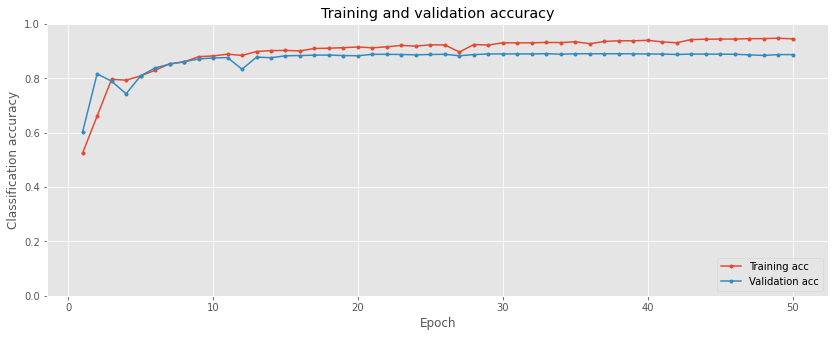

In [51]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = hisotry.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [52]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [53]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open('/content/vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('/content/meta.tsv', 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [12]:
from tensorflow.keras import layers, models, callbacks

In [13]:
# Create a SimpleRNN layer and test it

simple_rnn_layer = layers.SimpleRNN(units=64, activation="tanh")

In [14]:
# Note that only the final cell output is returned

sequence_exm = tf.constant([[[1, 4], [-4, 2], [2, 1]]], dtype=tf.float32)
print(sequence_exm.shape)
sequence_out = simple_rnn_layer(sequence_exm)
print(sequence_out.shape)

(1, 3, 2)
(1, 64)


#### Load and transform the IMDB review sentiment dataset

In [15]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [18]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=1000)


In [17]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [19]:
# Get the word index using get_imdb_word_index()

word_index = get_imdb_word_index(num_words=1000)

#### Create a recurrent neural network model

In [20]:
# Get the maximum index value

max_token = max(word_index.values())
max_token

1000

In [22]:
embedding_dims = 16

In [23]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(None,)))
model.add(layers.Embedding(input_dim=max_token+1, output_dim=embedding_dims, mask_zero=False))
model.add(layers.LSTM(units=16))
model.add(layers.Dense(units=1, activation="relu"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          16016     
_________________________________________________________________
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 18,145
Trainable params: 18,145
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Functional API refresher: use the Model to build the same model

inputs = layers.Input(shape=(None,))
h = layers.Embedding(input_dim=max_token+1, output_dim=embedding_dims, mask_zero=True)(inputs)
h = layers.LSTM(units=16)(h)
outputs = layers.Dense(units=1, activation="relu")(h)

model = models.Model(inputs=inputs, outputs=outputs)

In [26]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          16016     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 18,145
Trainable params: 18,145
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit the model

In [27]:
# Compile the model with binary cross-entropy loss

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [28]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=1, 
                    validation_data=(x_test, y_test))

  3/782 [..............................] - ETA: 44:49 - loss: 2.6449 - accuracy: 0.4583

KeyboardInterrupt: ignored

#### Plot learning curves

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [67]:
# View the first test data example sentence
# (invert the word index)

inv_word_index = {value:key for key,value in word_index.items()}

In [68]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

array([[0.02788317]], dtype=float32)

In [69]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=1000)

17465344/17464789 [==============================] - 0s 0us/step


In [4]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [5]:
# Get the word index using get_imdb_word_index()

word_index = get_imdb_word_index(num_words=1000)

1646592/1641221 [==============================] - 0s 0us/step


#### Build stacked and bidirectional recurrent models

In [6]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(word_index.values())
embedding_dims = 8

In [7]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(None,)))
model.add(layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dims, mask_zero=True))
model.add(layers.LSTM(units=32, return_sequences=True))
model.add(layers.LSTM(units=32, return_sequences=False))
model.add(layers.Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 8)           8008      
_________________________________________________________________
lstm (LSTM)                  (None, None, 32)          5248      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,609
Trainable params: 21,609
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(None,)))
model.add(layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dims, mask_zero=True))
model.add(layers.Bidirectional(layer = layers.GRU(units=8, return_sequences=True), 
                               backward_layer = layers.GRU(units=8, go_backwards=True, return_sequences=True),
                               merge_mode="sum"))
model.add(layers.Bidirectional(layers.LSTM(units=8, return_sequences=False), merge_mode="concat"))
model.add(layers.Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 8)           8008      
_________________________________________________________________
bidirectional (Bidirectional (None, None, 8)           864       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(None,)))
model.add(layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dims, mask_zero=True))
model.add(layers.Bidirectional(layers.LSTM(units=8, return_sequences=True), merge_mode="concat"))
model.add(layers.GRU(units=8, return_sequences=False))
model.add(layers.Dense(units=1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 8)           8008      
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 16)          1088      
_________________________________________________________________
gru_2 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit the model

In [10]:
# Compile the model

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
# Train the model, saving its history

history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=5, 
                    validation_data=(x_test, y_test))

Epoch 1/5
   4/1563 [..............................] - ETA: 1:20:33 - loss: 0.6944 - accuracy: 0.3750

KeyboardInterrupt: ignored

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);